Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.
1.	Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of 
the suitable techniques to deal with them.
2.	Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3.	Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the 
following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear 
one, or to decrease the skewness and convert the distribution into a normal distribution.

Reason and document your approach properly.


In [1047]:
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt  
import seaborn as sns           # importing pandas and numpy library

In [1048]:
data = [[32, 39, 72, 7, 41, 78],[19, 33, 45, 6, None, 89],[45, 87, 79, 10, 34, None],[21, 21, '?', 4, 39, 65],
       [91, -39, 75, -4, 45, 91], [66, None, 66, 8, 21, '?'], [23, 43, None, 7, -21, 81], [11, 36, 56, 5, 76, 76], [54, 45, 71, None, 32, 150]
       , [76, 11, 122, -4, None, 94], [10, 43, 72, 7, 41, 94]]           # creating the dataset

In [1049]:
df = pd.DataFrame(data, columns = ['Roll.no', 'OOP(50)', 'EM-3(80)', 'EM-3 Tut(10)', 'DSA(50)', 'CN(100)'])  # creating a dataframe and naming the columns

In [1050]:
df.head()                         # displaying top 5 rows

,Roll.no,OOP(50),EM-3(80),EM-3 Tut(10),DSA(50),CN(100)
0,32,39.0,72,7.0,41.0,78
1,19,33.0,45,6.0,NaN,89
2,45,87.0,79,10.0,34.0,None
3,21,21.0,?,4.0,39.0,65
4,91,-39.0,75,-4.0,45.0,91


In [1051]:
df.describe()                    # Describing the dataset

,Roll.no,OOP(50),EM-3 Tut(10),DSA(50)
count,11.000000,10.000000,10.000000,9.000000
mean,40.727273,31.900000,4.600000,34.222222
std,27.720357,31.806533,4.812022,25.508713
min,10.000000,-39.000000,-4.000000,-21.000000
25%,20.000000,24.000000,4.250000,32.000000
50%,32.000000,37.500000,6.500000,39.000000
75%,60.000000,43.000000,7.000000,41.000000
max,91.000000,87.000000,10.000000,76.000000


In [1052]:
df.shape                       # finding the shape of the dataset

(11, 6)

In [1053]:
df.dtypes                     # Data types of dataset

Roll.no           int64
OOP(50)         float64
EM-3(80)         object
EM-3 Tut(10)    float64
DSA(50)         float64
CN(100)          object
dtype: object

In [1054]:
df.isnull().sum()              # counting the number of null values of each columns

Roll.no         0
OOP(50)         1
EM-3(80)        1
EM-3 Tut(10)    1
DSA(50)         2
CN(100)         1
dtype: int64

In [1055]:
df.replace('?', np.nan, inplace = True)              # replacing the unwanted value that is '?' with null values

In [1056]:
df.isnull().sum()              # counting the number of null values of each columns

Roll.no         0
OOP(50)         1
EM-3(80)        2
EM-3 Tut(10)    1
DSA(50)         2
CN(100)         2
dtype: int64

In [1057]:
df['OOP(50)'].unique()

array([ 39.,  33.,  87.,  21., -39.,  nan,  43.,  36.,  45.,  11.])

In [1058]:
df['OOP(50)'].fillna(df['OOP(50)'].median(), inplace = True)
df['EM-3(80)'].fillna(df['EM-3(80)'].median(), inplace = True)
df['EM-3 Tut(10)'].fillna(df['EM-3 Tut(10)'].median(), inplace = True)
df['DSA(50)'].fillna(df['DSA(50)'].median(), inplace = True)
df['CN(100)'].fillna(df['CN(100)'].median(), inplace = True)           # replacing the null values with the median of the column

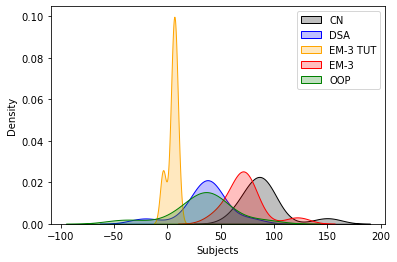

In [1059]:
sns.kdeplot(df['CN(100)'], color='black', label = 'CN', shade=True)
sns.kdeplot(df['DSA(50)'], color='blue', label = 'DSA', shade=True)
sns.kdeplot(df['EM-3 Tut(10)'], color='orange', label = 'EM-3 TUT', shade=True)
sns.kdeplot(df['EM-3(80)'], color='red', label = 'EM-3', shade=True)
sns.kdeplot(df['OOP(50)'], color='green', label = 'OOP', shade=True)
plt.xlabel("Subjects")
plt.legend()
plt.show()

In [1060]:
df

,Roll.no,OOP(50),EM-3(80),EM-3 Tut(10),DSA(50),CN(100)
0,32,39.0,72.0,7.0,41.0,78.0
1,19,33.0,45.0,6.0,39.0,89.0
2,45,87.0,79.0,10.0,34.0,89.0
3,21,21.0,72.0,4.0,39.0,65.0
4,91,-39.0,75.0,-4.0,45.0,91.0
5,66,37.5,66.0,8.0,21.0,89.0
6,23,43.0,72.0,7.0,-21.0,81.0
7,11,36.0,56.0,5.0,76.0,76.0
8,54,45.0,71.0,6.5,32.0,150.0
9,76,11.0,122.0,-4.0,39.0,94.0


In [1061]:
# column = [['OOP(50)', 50], ['EM-3(80)', 80], ['EM-3 Tut(10)', 10], ['DSA(50)', 50], ['CN(100)', 100] ]
# # l = []
# for i in column:
# #     k = i[0]
# #     Q1 = np.percentile(df[k], 25, interpolation = 'midpoint')
# #     Q3 = np.percentile(df[k], 75, interpolation = 'midpoint')
# #     print(Q1)
# #     print(Q3)
#      k = i[0]
#      meanColumn = np.mean(df[k])
#      stdColumn = np.std(df[k])
#      threshold = -0.4
#      threshold2 = 1.5
#      outlier = []
    
#      for j in df[k]:
#          z = (j-meanColumn)/stdColumn
#          if z>threshold2 or z<threshold:
#              outlier.append(j)
#              df[k].replace(j, np.nan, inplace = True)
#      print('outlier in dataset is', outlier)
# #     outlier = []
# #     for j in df[k]:
        
# #         if j != None:
# #             if j not in range(int(Q1*0.6), int(Q3*0.6)):
# #                 outlier.append(j)
# #                 df[k].replace(j, np.nan, inplace = True)
                
# #     print('outlier in dataset is', outlier)

# # If the value is not in the range of max marks then replacing the value by null

# # Finding the z-score to find the outliers of the dataset

In [1062]:
meanColumn = np.mean(df["OOP(50)"])
stdColumn = np.std(df["OOP(50)"])
threshold = -0.2
threshold2 = 1.5
outlier = []

for j in df['OOP(50)']:
 z = (j-meanColumn)/stdColumn
 if z>threshold2 or z<threshold:
     outlier.append(j)
     df["OOP(50)"].replace(j, np.nan, inplace = True)
print('outlier in dataset is', outlier)

meanColumn = np.mean(df["EM-3(80)"])
stdColumn = np.std(df["EM-3(80)"])
threshold = -0.4
threshold2 = 1.5
outlier = []

for j in df['EM-3(80)']:
 z = (j-meanColumn)/stdColumn
 if z>threshold2 or z<threshold:
     outlier.append(j)
     df["EM-3(80)"].replace(j, np.nan, inplace = True)
print('outlier in dataset is', outlier)


meanColumn = np.mean(df["EM-3 Tut(10)"])
stdColumn = np.std(df["EM-3 Tut(10)"])
threshold = -0.7
threshold2 = 1.5
outlier = []

for j in df['EM-3 Tut(10)']:
 z = (j-meanColumn)/stdColumn
 if z>threshold2 or z<threshold:
     outlier.append(j)
     df["EM-3 Tut(10)"].replace(j, np.nan, inplace = True)
print('outlier in dataset is', outlier)

meanColumn = np.mean(df["DSA(50)"])
stdColumn = np.std(df["DSA(50)"])
threshold = -0.4
threshold2 = 1.0
outlier = []

for j in df['DSA(50)']:
 z = (j-meanColumn)/stdColumn
 if z>threshold2 or z<threshold:
     outlier.append(j)
     df["DSA(50)"].replace(j, np.nan, inplace = True)
print('outlier in dataset is', outlier)

meanColumn = np.mean(df["CN(100)"])
stdColumn = np.std(df["CN(100)"])
threshold = -1
threshold2 = 0
outlier = []

for j in df['CN(100)']:
 z = (j-meanColumn)/stdColumn
 if z>threshold2 or z<threshold:
     outlier.append(j)
     df["CN(100)"].replace(j, np.nan, inplace = True)
print('outlier in dataset is', outlier)

outlier in dataset is [87.0, 21.0, -39.0, 11.0]
outlier in dataset is [45.0, 56.0, 122.0]
outlier in dataset is [-4.0]
outlier in dataset is [21.0, -21.0, 76.0]
outlier in dataset is [65.0, 91.0, 150.0, 94.0]


In [1063]:
print(df.head())

   Roll.no  OOP(50)  EM-3(80)  EM-3 Tut(10)  DSA(50)  CN(100)
0       32     39.0      72.0           7.0     41.0     78.0
1       19     33.0       NaN           6.0     39.0     89.0
2       45      NaN      79.0          10.0     34.0     89.0
3       21      NaN      72.0           4.0     39.0      NaN
4       91      NaN      75.0           NaN     45.0      NaN


In [1064]:
df['OOP(50)'].fillna(df['OOP(50)'].median(), inplace = True)
df['EM-3(80)'].fillna(df['EM-3(80)'].median(), inplace = True)
df['EM-3 Tut(10)'].fillna(df['EM-3 Tut(10)'].median(), inplace = True)
df['DSA(50)'].fillna(df['DSA(50)'].median(), inplace = True)
df['CN(100)'].fillna(df['CN(100)'].median(), inplace = True)           # replacing the null values with the median of the column

In [1065]:
df.head()                     # displaying the top 5 values

,Roll.no,OOP(50),EM-3(80),EM-3 Tut(10),DSA(50),CN(100)
0,32,39.0,72.0,7.0,41.0,78.0
1,19,33.0,72.0,6.0,39.0,89.0
2,45,39.0,79.0,10.0,34.0,89.0
3,21,39.0,72.0,4.0,39.0,85.0
4,91,39.0,75.0,7.0,45.0,85.0


In [1066]:
df

,Roll.no,OOP(50),EM-3(80),EM-3 Tut(10),DSA(50),CN(100)
0,32,39.0,72.0,7.0,41.0,78.0
1,19,33.0,72.0,6.0,39.0,89.0
2,45,39.0,79.0,10.0,34.0,89.0
3,21,39.0,72.0,4.0,39.0,85.0
4,91,39.0,75.0,7.0,45.0,85.0
5,66,37.5,66.0,8.0,39.0,89.0
6,23,43.0,72.0,7.0,39.0,81.0
7,11,36.0,72.0,5.0,39.0,76.0
8,54,45.0,71.0,6.5,32.0,85.0
9,76,39.0,72.0,7.0,39.0,85.0


In [1067]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()                # Converting all the marks in one scale i.e. in the range of 0-1

In [1068]:
df[["OOP(50)", "EM-3(80)", "EM-3 Tut(10)", "DSA(50)", "CN(100)"]] = min_max_scaler.fit_transform(df[["OOP(50)", "EM-3(80)", "EM-3 Tut(10)", "DSA(50)", "CN(100)"]])

In [1069]:
df

,Roll.no,OOP(50),EM-3(80),EM-3 Tut(10),DSA(50),CN(100)
0,32,0.500000,0.461538,0.500000,0.692308,0.153846
1,19,0.000000,0.461538,0.333333,0.538462,1.000000
2,45,0.500000,1.000000,1.000000,0.153846,1.000000
3,21,0.500000,0.461538,0.000000,0.538462,0.692308
4,91,0.500000,0.692308,0.500000,1.000000,0.692308
5,66,0.375000,0.000000,0.666667,0.538462,1.000000
6,23,0.833333,0.461538,0.500000,0.538462,0.384615
7,11,0.250000,0.461538,0.166667,0.538462,0.000000
8,54,1.000000,0.384615,0.416667,0.000000,0.692308
9,76,0.500000,0.461538,0.500000,0.538462,0.692308


In [1073]:
sns.boxplot(y='value', x = 'variable',df['OOP(50)', 'EM-3(80)', 'EM-3 Tut(10)', 'DSA(50)', 'CN(100)'], grid = False)

SyntaxError: positional argument follows keyword argument (<ipython-input-1073-4895d85ac2d9>, line 1)

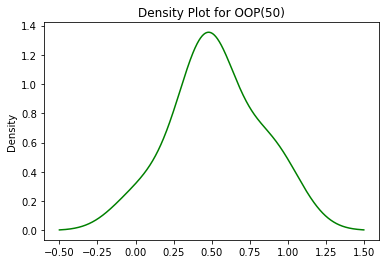

In [1072]:
df['OOP(50)'].plot.density(color='green')
plt.title('Density Plot for OOP(50)')
plt.show()

In [ ]:
df['EM-3(80)'].plot.density(color='red')
plt.title('Density Plot of EM-3(80)')
plt.show()

In [ ]:
df['EM-3 Tut(10)'].plot.density(color='orange')
plt.title('Density Plot of EM-3 Tut(10)')
plt.show()

In [ ]:
df['DSA(50)'].plot.density(color='blue')
plt.title('Density Plot of DSA(50)')
plt.show()

In [ ]:
df['CN(100)'].plot.density(color='black')
plt.title('Density Plot of CN(100)')
plt.show()

In [ ]:
sns.kdeplot(df['CN(100)'], color='black', label = 'CN', shade=True)
sns.kdeplot(df['DSA(50)'], color='blue', label = 'DSA', shade=True)
sns.kdeplot(df['EM-3 Tut(10)'], color='orange', label = 'EM-3 TUT', shade=True)
sns.kdeplot(df['EM-3(80)'], color='red', label = 'EM-3', shade=True)
sns.kdeplot(df['OOP(50)'], color='green', label = 'OOP', shade=True)
plt.xlabel("Subjects")
plt.legend()
plt.show()

In [ ]:
df['Average'] = df.iloc[:, 1:6].mean(axis=1)*100    # finding the average of students marks and storing it in the average column

In [ ]:
df